# Mobile Price Classification 
EDA, Training and predicting values, Model performance using Decision tree and finding accuracy score using 
Bagging, Random Forest, Grid search, Gradient Boosting And Ada Boost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_test = pd.read_csv("test.csv")

In [3]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [4]:
df_train = pd.read_csv("train.csv")

In [5]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df_train.shape

(2000, 21)

In [8]:
df_test.shape

(1000, 21)

In [9]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# EXPLORATORY DATA ANALYSIS

In [10]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

<AxesSubplot:title={'center':'Mobile Price Range'}, xlabel='wifi', ylabel='count'>

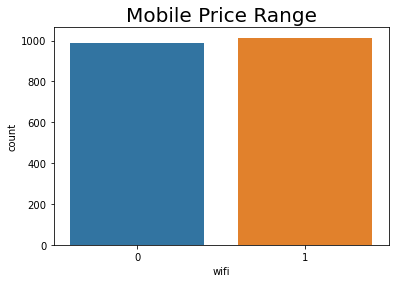

In [11]:
plt.title('Mobile Price Range', fontsize=20)
sns.countplot(x='wifi', data = df_train)

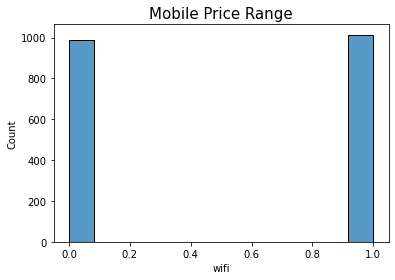

In [12]:
plt.title('Mobile Price Range', fontsize=15)
hist = sns.histplot(df_train.wifi)

<AxesSubplot:title={'center':'Mobile Price Range'}, xlabel='price_range', ylabel='count'>

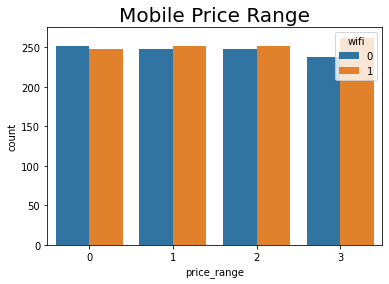

In [13]:
plt.title('Mobile Price Range', fontsize=20)
sns.countplot(x='price_range',hue='wifi', data = df_train)

From above graphs price range with Wifi is slightly higher 
and in below graph all accessory mobile have equal price

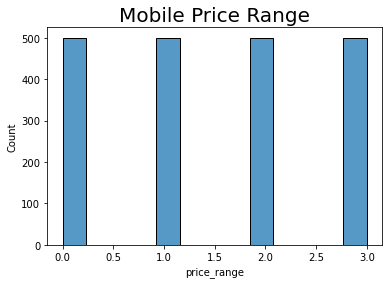

In [14]:
plt.title('Mobile Price Range', fontsize=20)
hist = sns.histplot(df_train.price_range)

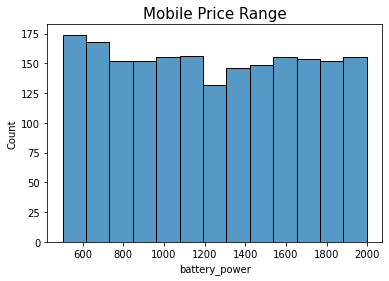

In [15]:
plt.title('Mobile Price Range', fontsize=15)
hist = sns.histplot(df_train.battery_power)

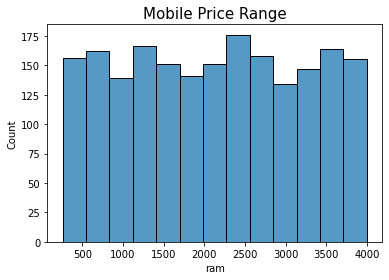

In [16]:
plt.title('Mobile Price Range', fontsize=15)
hist = sns.histplot(df_train.ram)

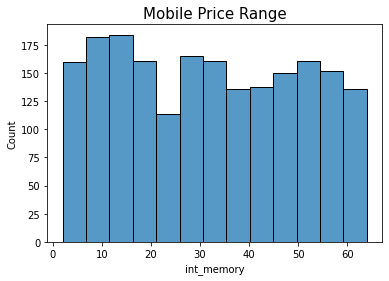

In [17]:
plt.title('Mobile Price Range', fontsize=15)
hist = sns.histplot(df_train.int_memory)

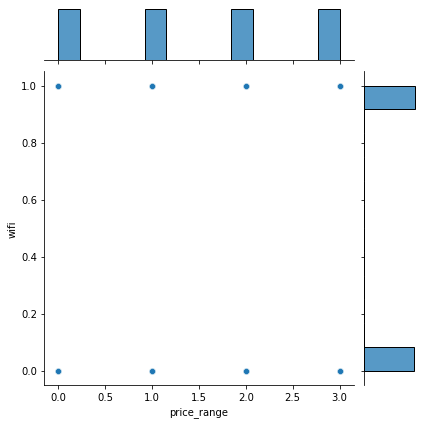

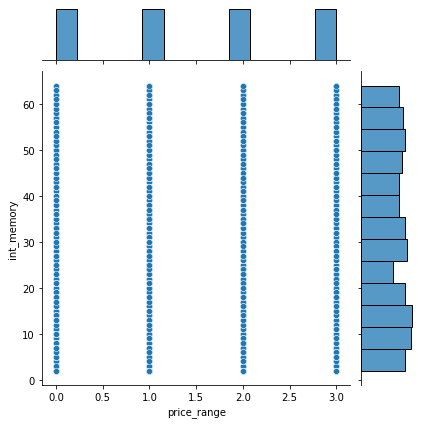

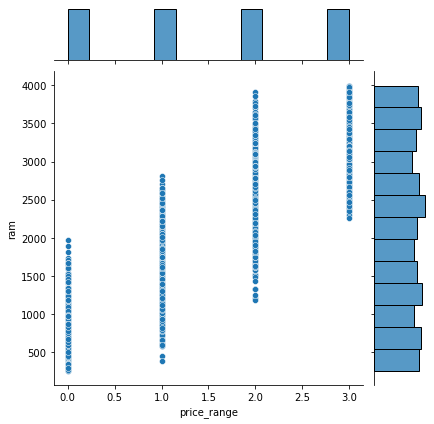

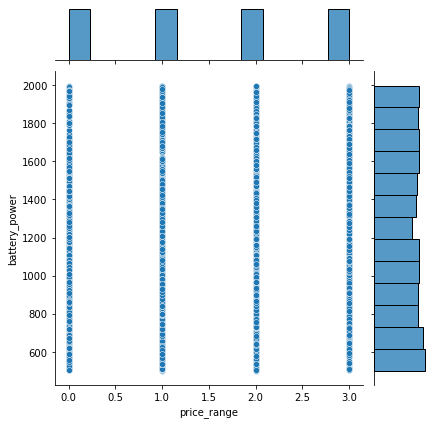

In [18]:
d1 = sns.jointplot(data=df_train, x='price_range', y='wifi')
d2 = sns.jointplot(data=df_train, x='price_range', y='int_memory')
d3 = sns.jointplot(data=df_train, x='price_range', y='ram')
d4 = sns.jointplot(data=df_train, x='price_range', y='battery_power')

From above graphs shows price varies by wifi, int memory and Ram

# Dummy Variable Creation

In [19]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [20]:
df = pd.get_dummies(df_train,columns = ["battery_power", "int_memory", "dual_sim", "price_range"],drop_first = True)

In [21]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# X-y split

In [22]:
X = df_train.loc[:,df_train.columns!="price_range"]
type(X)

pandas.core.frame.DataFrame

In [23]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [24]:
X.shape

(2000, 20)

In [25]:
y = df_train["price_range"]
type(y)

pandas.core.series.Series

In [26]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [27]:
y.shape

(2000,)

# Test-Train Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [30]:
X_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
582,1232,0,2.9,1,1,1,24,0.3,169,5,17,361,809,1257,16,10,16,1,0,0
159,1840,0,0.5,1,12,0,34,0.7,142,1,16,311,1545,1078,8,0,10,0,0,0
1827,1692,0,2.1,0,4,1,2,0.9,106,1,17,1899,1904,3779,9,3,7,1,1,1
318,508,0,0.8,0,7,1,42,0.3,94,1,8,39,557,663,13,12,7,1,0,0
708,977,1,2.8,1,2,0,35,0.6,165,2,15,1502,1862,3714,19,3,10,0,1,1


In [31]:
X_train.shape

(1600, 20)

In [32]:
X_test.shape

(400, 20)

# Training Classification Tree

In [33]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 3)

In [34]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

# Predict values using trained model

In [35]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [36]:
y_test_pred

array([3, 0, 2, 1, 3, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 1, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 2,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 2, 0, 2, 3, 1, 0, 3, 3, 1, 3, 2, 2, 2,
       3, 2, 1, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 1, 3, 3, 2, 0, 0, 0, 2, 1,
       1, 3, 1, 2, 3, 1, 0, 2, 3, 3, 0, 3, 1, 2, 3, 1, 3, 1, 2, 2, 2, 3,
       3, 0, 0, 2, 2, 3, 1, 1, 1, 0, 1, 3, 1, 2, 1, 2, 1, 1, 0, 3, 1, 3,
       2, 2, 3, 3, 3, 1, 0, 1, 1, 2, 2, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 1, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 2, 3, 1,
       1, 2, 3, 0, 3, 1, 1, 1, 2, 1, 2, 0, 2, 3, 1, 1, 1, 2, 3, 0, 1, 2,
       1, 0, 3, 3, 3, 1, 1, 2, 2, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 2, 2, 2, 2, 1, 2, 1, 1, 0, 3, 3, 0, 3, 2, 0, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 1, 3, 3, 2, 0, 0, 1, 3,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 2, 3, 3, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 3, 0, 3, 0, 1,

# Model Performance

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
confusion_matrix(y_train, y_train_pred)

array([[319,  86,   0,   0],
       [ 29, 332,  47,   0],
       [  0,  82, 259,  60],
       [  0,   0,  58, 328]], dtype=int64)

In [39]:
confusion_matrix(y_test, y_test_pred)

array([[77, 18,  0,  0],
       [ 4, 73, 15,  0],
       [ 0, 25, 60, 14],
       [ 0,  0, 21, 93]], dtype=int64)

In [40]:
accuracy_score(y_test, y_test_pred)

0.7575

# Plotting decision tree

In [41]:
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= X_train.columns, filled = True)

In [42]:
from IPython.display import Image

In [43]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [44]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

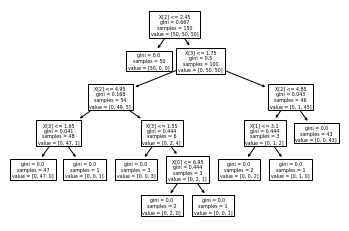

In [45]:
tree.plot_tree(clf)

# Bagging

In [46]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [47]:
from sklearn.ensemble import BaggingClassifier

In [48]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [49]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [50]:
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[ 88,   7,   0,   0],
       [  4,  81,   7,   0],
       [  0,   6,  83,  10],
       [  0,   0,   8, 106]], dtype=int64)

In [51]:
accuracy_score(y_test, bag_clf.predict(X_test))

0.895

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

In [54]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [55]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[ 92,   3,   0,   0],
       [  6,  74,  12,   0],
       [  0,  16,  74,   9],
       [  0,   0,   8, 106]], dtype=int64)

In [56]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.865

# Grid Search

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)

In [59]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2, 3, 10],
              }

In [60]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [61]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [62]:
grid_search.best_params_

{'max_features': 10, 'min_samples_split': 2}

In [63]:
cvrf_clf = grid_search.best_estimator_

In [64]:
accuracy_score(y_test, cvrf_clf.predict(X_test))

0.9

In [65]:
confusion_matrix(y_test, cvrf_clf.predict(X_test))

array([[ 91,   4,   0,   0],
       [  3,  82,   7,   0],
       [  0,   7,  81,  11],
       [  0,   0,   8, 106]], dtype=int64)

# Gradient Boosting

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [68]:
accuracy_score(y_test, gbc_clf.predict(X_test))

0.9125

In [69]:
gbc_clf2 = GradientBoostingClassifier(learning_rate =0.02, n_estimators =1000, max_depth = 1)
gbc_clf2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [70]:
accuracy_score(y_train, gbc_clf2.predict(X_train))

0.90875

In [71]:
accuracy_score(y_test, gbc_clf2.predict(X_test))

0.8575

# Ada Boost

In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
ada_clf = AdaBoostClassifier(learning_rate =0.02, n_estimators =5000)

In [74]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [75]:
accuracy_score(y_train, ada_clf.predict(X_train))

0.436875

In [76]:
accuracy_score(y_test, ada_clf.predict(X_test))

0.3825

In [77]:
ada_clf2 = AdaBoostClassifier(rf_clf,learning_rate =0.05, n_estimators =500)

In [78]:
ada_clf2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=250,
                                                         random_state=42),
                   learning_rate=0.05, n_estimators=500)

In [79]:
accuracy_score(y_test, ada_clf2.predict(X_test))

0.87